---
layout: page
title: Programming with Python
subtitle: Analyzing Data from Multiple Files
minutes: 20
---
> ## Learning Objectives {.objectives}
>
> *   Use a library function to get a list of filenames that match a simple wildcard pattern.
> *   Use a for loop to process multiple files.

We now have almost everything we need to process all our data files.
The only thing that's missing is a library with a rather unpleasant name:

## Analyzing Data from Multiple Files

*Search in the file system.*

In [2]:
import glob

The `glob` library contains a single function, also called `glob`, that finds files whose names match a pattern. 

In [3]:
help(glob.glob)

Help on function glob in module glob:

glob(pathname, *, recursive=False)
    Return a list of paths matching a pathname pattern.
    
    The pattern may contain simple shell-style wildcards a la
    fnmatch. However, unlike fnmatch, filenames starting with a
    dot are special cases that are not matched by '*' and '?'
    patterns.
    
    If recursive is true, the pattern '**' will match any files and
    zero or more directories and subdirectories.



The `glob` library contains a single function, also called `glob`,
that finds files whose names match a pattern.
We provide those patterns as strings:
the character `*` matches zero or more characters,
while `?` matches any one character.
We can use this to get the names of all the CSV files in the current directory:

We can use this to get the names of all the CSV files in the current directory:

In [6]:
print(glob.glob('data/inflammation*.csv'))

['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-05.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-08.csv', 'data/inflammation-09.csv', 'data/inflammation-10.csv', 'data/inflammation-11.csv', 'data/inflammation-12.csv']


It returns a list, then we can loop over this.

As these examples show,
`glob.glob`'s result is a list of strings,
which means we can loop over it
to do something with each filename in turn.
In our case,
the "something" we want to do is generate a set of plots for each file in our inflammation dataset.
Let's test it by analyzing the first three files in the list:

data/inflammation-01.csv


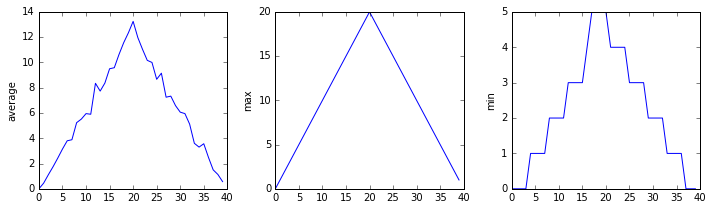

data/inflammation-02.csv


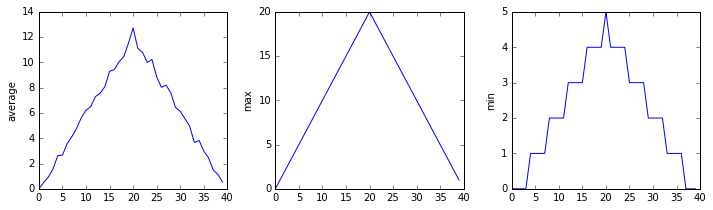

data/inflammation-03.csv


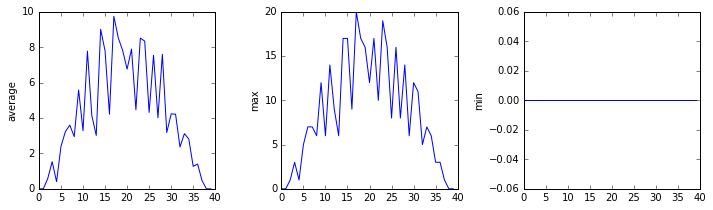

In [8]:
%matplotlib inline
import numpy
import matplotlib.pyplot

filenames = glob.glob('data/inflammation*.csv')
filenames = filenames[0:3]
for f in filenames:
    print(f)

    data = numpy.loadtxt(fname=f, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('max')
    axes2.plot(data.max(axis=0))

    axes3.set_ylabel('min')
    axes3.plot(data.min(axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()